In [1]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [288]:
URL = 'https://raw.githubusercontent.com/KaiL4eK/ml_edu/master/datasets/Titanic_train.csv'
src_df = pd.read_csv(URL)
src_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(f'Shape of data: {src_df.shape}')
print(src_df.columns)

Shape of data: (891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Базовый анализ

In [5]:
print(src_df['PassengerId'].nunique())
print(src_df['PassengerId'].count())
src_df['PassengerId'].head()

891
891


0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [6]:

src_df['Name'].describe()

count                          891
unique                         891
top       O'Connell, Mr. Patrick D
freq                             1
Name: Name, dtype: object

In [7]:
 src_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
# Двойные скобки использованы, чтобы передать в fit() 2D массив
X_in = src_df[['Age']]
print(X_in.shape)

src_df['Age'] = imp.fit_transform(X_in)
src_df.isnull().sum()

(891, 1)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:

imp = SimpleImputer(strategy='most_frequent')
src_df['Embarked'] = imp.fit_transform(src_df[['Embarked']])

src_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
src_df['Cabin'].isnull().sum()/src_df.shape[0]

0.7710437710437711

In [11]:
src_df.info()
src_df['Embarked'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Мы отключим создание разреженного представления, но оно оптимальнее для хранения
# Поэтому для отладки лучше использовать и проверять dense представление,
#   а для работы в конечном представлении - sparse
oh_enc = OneHotEncoder(sparse=False)

# Любой энкодер ненавидит пропуски в данных, поэтому перед использованием
#   заполните пропуски в данных
X_sample = src_df[['Embarked']]
print(X_sample.shape)

oh_enc.fit(X_sample)

(891, 1)


OneHotEncoder(sparse=False)

In [13]:
# Можно проверить, какие есть категории
oh_enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [14]:

# Также посмотреть, что происходит после кодирования с данными
X_sample_ohe = oh_enc.transform(X_sample)

print(X_sample[:6])
print(X_sample_ohe[:6])

  Embarked
0        S
1        C
2        S
3        S
4        S
5        Q
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [15]:
# Кидаем исключение, если появилась ранее невиданная категория
oh_enc = OneHotEncoder(sparse=False, handle_unknown='error')
oh_enc.fit(src_df[['Embarked']])

# Воспользуемся try-except, чтобы поймать ошибку
try:
    print(oh_enc.transform(np.array([['K']])))
except Exception as e:
    print(f'Error happened: {e}')

Error happened: Found unknown categories ['K'] in column 0 during transform


In [16]:
# Или просто игнорируем
oh_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
oh_enc.fit(src_df[['Embarked']])

# Воспользуемся try-except, чтобы поймать ошибку
try:
    print(oh_enc.transform(np.array([['K']])))
except Exception as e:
    print(f'Error happened: {e}')

[[0. 0. 0.]]


In [17]:
# Или просто игнорируем
oh_enc = OneHotEncoder(sparse=False, handle_unknown='ignore', categories=[['C', 'Q']])
X_sample = src_df[['Embarked']]
oh_enc.fit(X_sample)

X_sample_ohe = oh_enc.transform(X_sample)

print(X_sample[:6])
print(X_sample_ohe[:6])

  Embarked
0        S
1        C
2        S
3        S
4        S
5        Q
[[0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]]


In [18]:

from sklearn.pipeline import Pipeline

categorical_features = ['Sex', 'Embarked']

# Создаем обработчик категориальный признаков
# Так как имеются пропущенные данные в Embarked - 
#   создадим Pipeline для выполнения нескольких шагов
categorical_transformer = Pipeline(
    # Шаги в Pipeline указываются как кортежи, каждый из которых
    #   представляет собой (имя шага, трансформер)
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        # Опять sparse для отладки = False
        ('enc', OneHotEncoder(sparse=False, handle_unknown='error')),                   
])

In [19]:
URL = 'https://raw.githubusercontent.com/KaiL4eK/ml_edu/master/datasets/Titanic_train.csv'
df = pd.read_csv(URL)

categorical_transformer.fit(df[categorical_features])

X_transformed = categorical_transformer.transform(df[categorical_features])
print(df[categorical_features][:3])
print(X_transformed[:3])

      Sex Embarked
0    male        S
1  female        C
2  female        S
[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]]


In [20]:
# До конкретных шагов можно добраться через атрибут named_steps
categorical_transformer.named_steps['enc'].categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [21]:

# Или посмотреть названия признаков после кодирования
categorical_transformer.named_steps['enc'].get_feature_names(categorical_features)

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [22]:
from sklearn.compose import ColumnTransformer
# Составляет список признаков для обработки
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Age', 'Fare']

# Создаем обработчик категориальных признаков
categorical_transformer = Pipeline(
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('enc', OneHotEncoder(handle_unknown='error')),                   
])

# Численные значения имеют пропуски, заполним стратегией медианы
numeric_transformer = SimpleImputer(strategy='median')

# Создаем конечный конвертер, который будет использован для 
#   предобработки
preprocessor = ColumnTransformer(
    # Список конвертеров, каждый кортеж содержит
    #   имя, конвертер и признаки, на которые он будет применен
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    # Признаки, не указанные ни в одном из конвертеров будут удалены
    remainder='drop'
)

preprocessor.fit(df)

X_data = preprocessor.transform(df)
print(type(X_data))

<class 'numpy.ndarray'>


In [23]:
# Получим объект пайплайна категориальных признаков
pipe = preprocessor.named_transformers_['cat']
# Отобразим категории OHE для шага кодирования
print(pipe.named_steps['enc'].categories_)

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]


In [24]:
# Для того, чтобы получить имена признаков, воспользуемся функцией
#   OneHotEncoder.get_feature_names()
# Чтобы ею воспользоваться, необходимо добраться до объекта через атрибуты
#   - ColumnTransformer.named_transformers_ + ключ имени
#   - Pipeline.named_steps + ключ шага
ohe_column_names = preprocessor \
    .named_transformers_['cat'] \
    .named_steps['enc'] \
    .get_feature_names(categorical_features)

recovered_feat_names = \
    list(ohe_column_names) + \
    list(numeric_features)

df_enc = pd.DataFrame(X_data, columns=recovered_feat_names)

df_enc.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0.0,1.0,0.0,0.0,1.0,22.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,38.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,26.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,35.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,35.0,8.0500


In [25]:
# Для сравнения выведем исходные данные
df[categorical_features + numeric_features].head()

,Sex,Embarked,Age,Fare
0,male,S,22.0,7.2500
1,female,C,38.0,71.2833
2,female,S,26.0,7.9250
3,female,S,35.0,53.1000
4,male,S,35.0,8.0500


[Text(418.5, 453.0, 'X[0] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = 0'),
 Text(209.25, 271.8, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(104.625, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(313.875, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(627.75, 271.8, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(523.125, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(732.375, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0')]

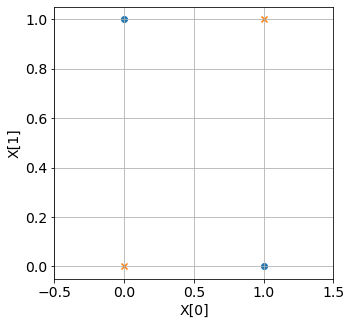

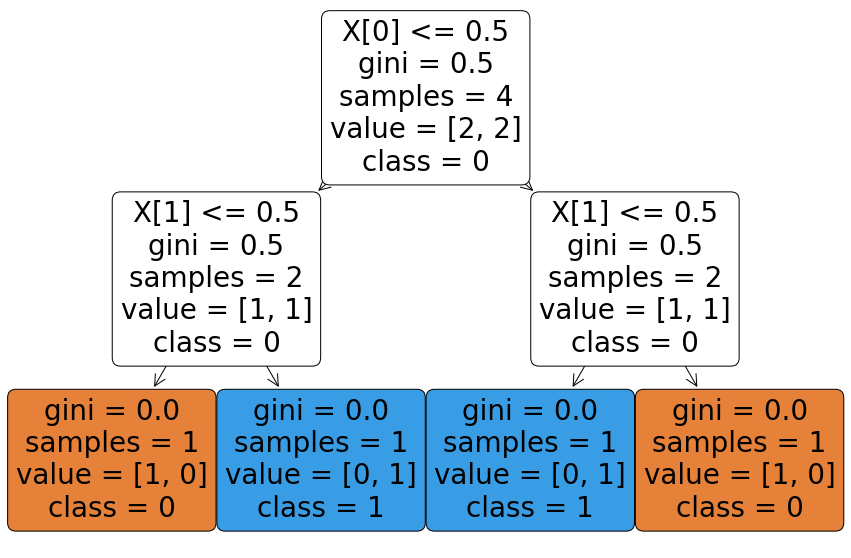

In [26]:
import numpy as np

# Пример решающего дерева на основе задачи XOR
X = np.array([
     [1, 1],
     [1, 0],
     [0, 1],
     [0, 0]
])

y = np.array([
     0,
     1,
     1,
     0
])

plt.figure(figsize=[5,5])
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o')
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.xlim([-0.5, 1.5])
plt.grid()

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

plt.figure()
plot_tree(tree, filled=True, rounded=True, impurity=True, class_names=['0', '1'])

In [27]:
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.8

y_data = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_data
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

Feature: Sex_female | 0.15224129686733381
Feature: Sex_male | 0.14384419737286344
Feature: Embarked_C | 0.011105298934466924
Feature: Embarked_Q | 0.004819245681205841
Feature: Embarked_S | 0.013524060985120172
Feature: Age | 0.2941428805908806
Feature: Fare | 0.3803230195681293


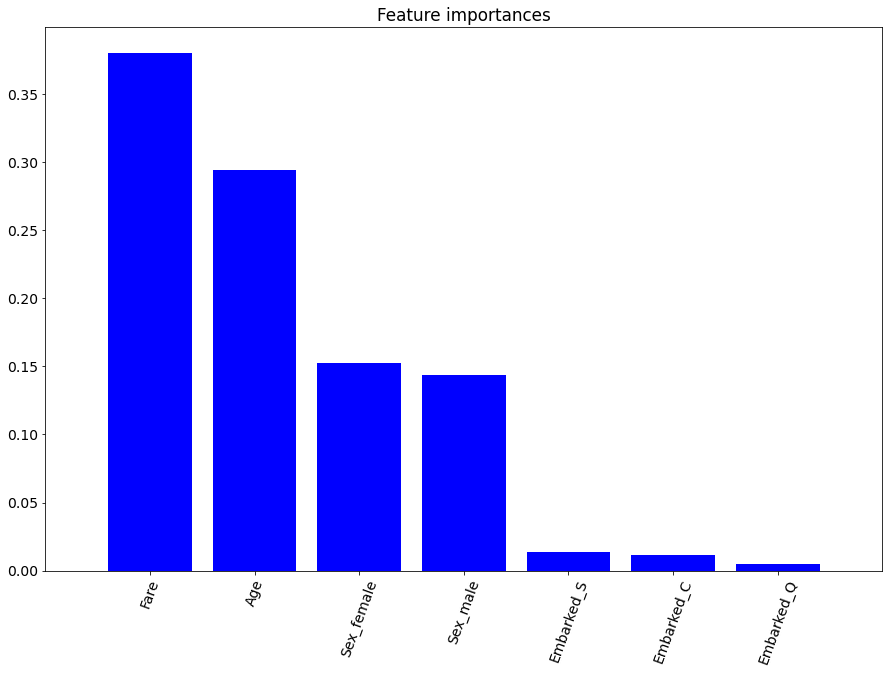

In [29]:
def show_importance(model, feature_names, X):
    importances = model.feature_importances_
    for feat_imp, feat_name in zip(importances, feature_names):
        print(f'Feature: {feat_name} | {feat_imp}')

    indices = np.argsort(importances)[::-1]
    sorted_feat_names = [feature_names[ind] for ind in indices]

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
    plt.xticks(range(X.shape[1]), sorted_feat_names, rotation=70)
    plt.xlim([-1, X.shape[1]])
    plt.show()

show_importance(rf_clf, recovered_feat_names, X_train)

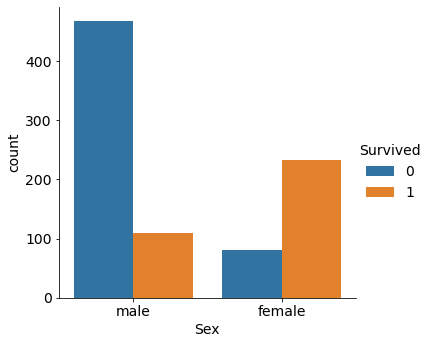

In [30]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)

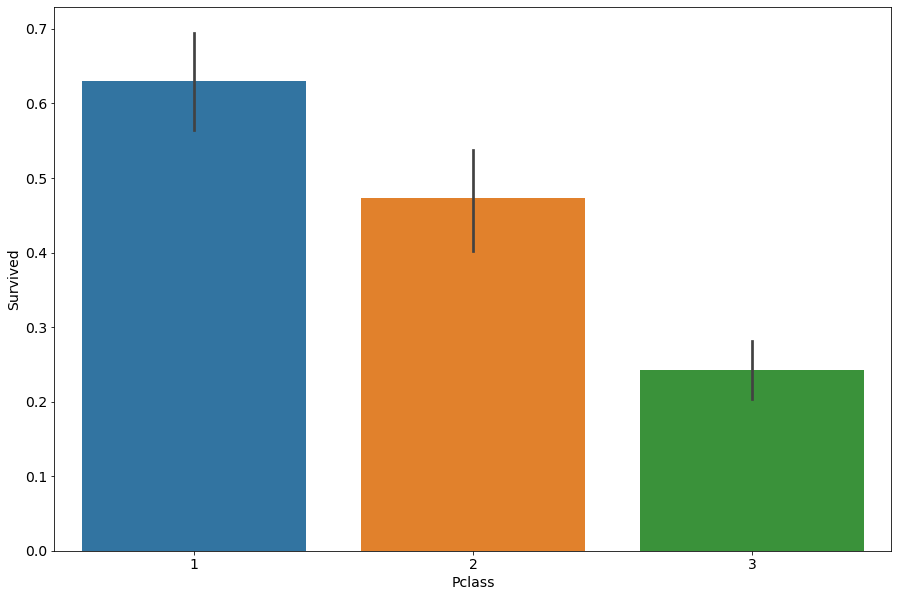

In [31]:
sns.barplot(x='Pclass', y='Survived', data=df)

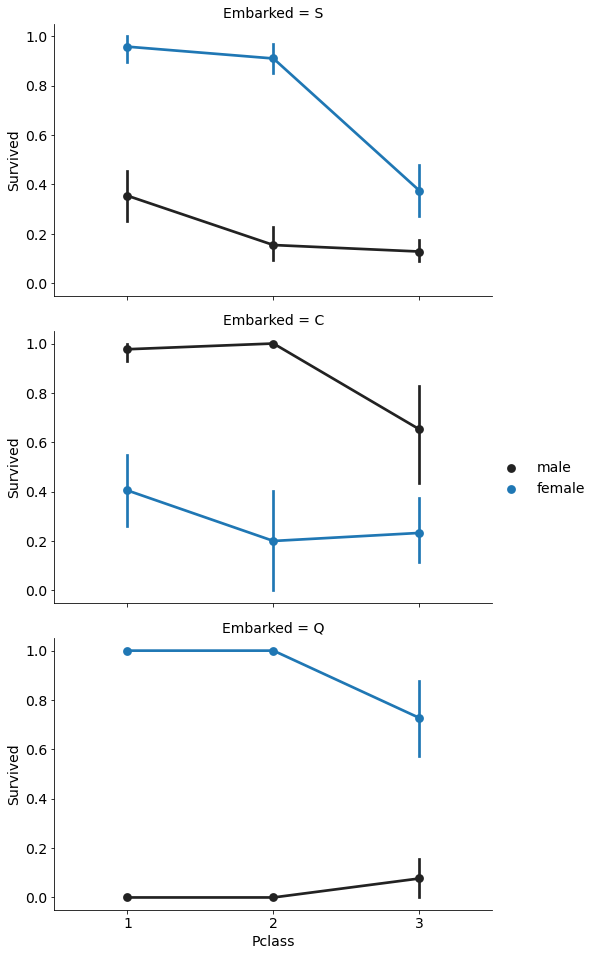

In [32]:
FacetGrid = sns.FacetGrid(df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None)
FacetGrid.add_legend()

In [33]:

# +1 - we are in family too
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

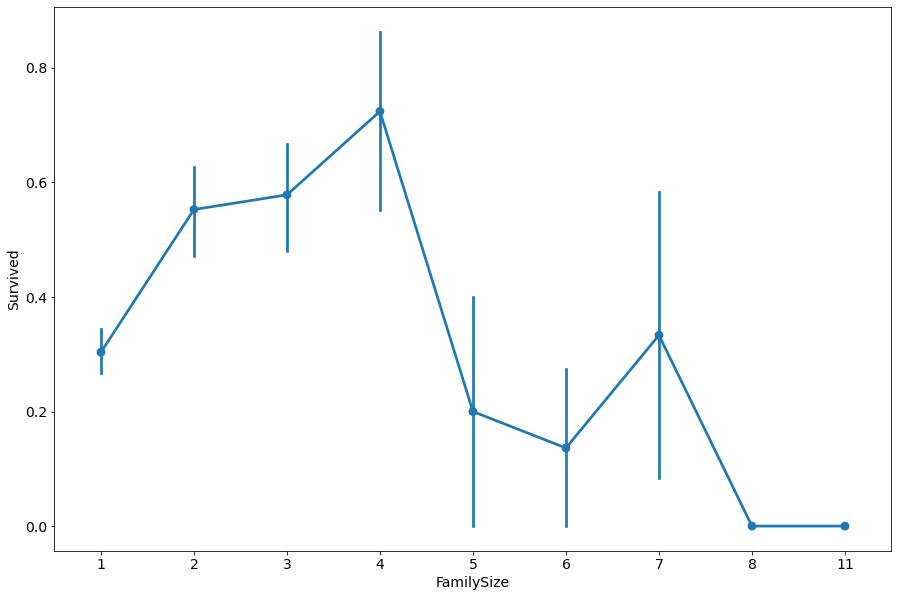

In [34]:

axes = sns.pointplot(x='FamilySize', y='Survived', data=df)

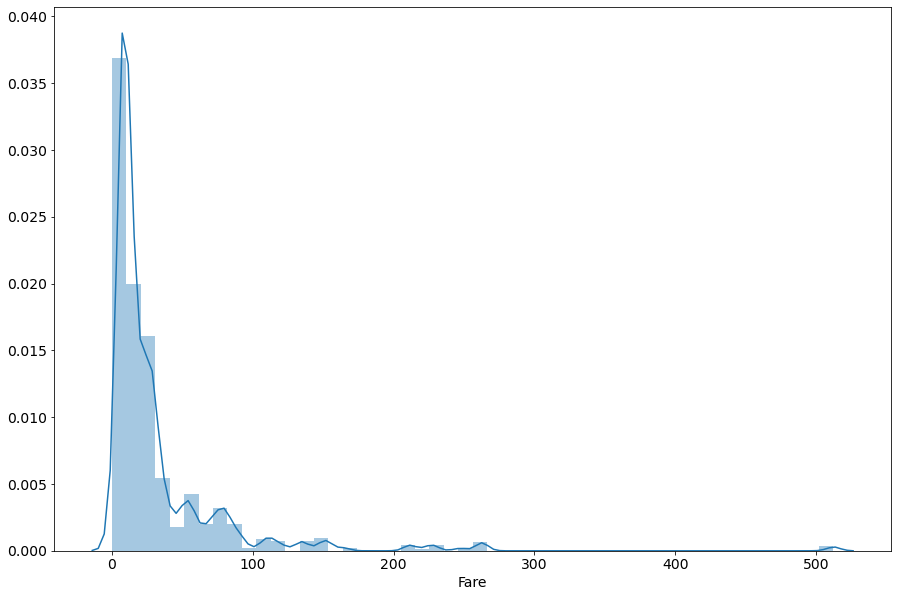

In [35]:
sns.distplot(df['Fare'], bins=50)

[array([  0.    ,   7.55  ,   7.8542,   8.05  ,  10.5   ,  14.4542,
        21.6792,  27.    ,  39.6875,  77.9583, 512.3292])]


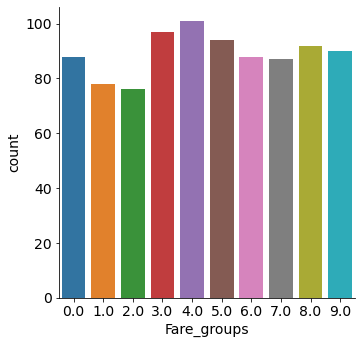

In [36]:
from sklearn.preprocessing import KBinsDiscretizer

discr = KBinsDiscretizer(
    # Количество бинов    
    n_bins=10,
    # Способ кодирования - порядковый
    encode='ordinal',
)

# Двойные скобки для передачи DataFrame (2D данные)
df['Fare_groups'] = discr.fit_transform(df[['Fare']])
# Отобразим границы бинов
print(discr.bin_edges_)

sns.catplot(x='Fare_groups', kind="count", data=df)

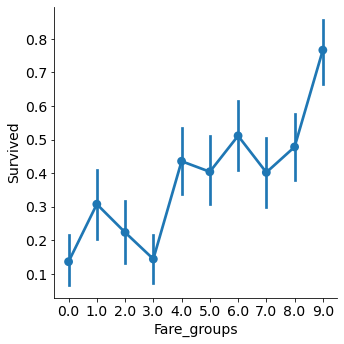

In [37]:
sns.catplot(x='Fare_groups', y='Survived', data=df, kind='point')

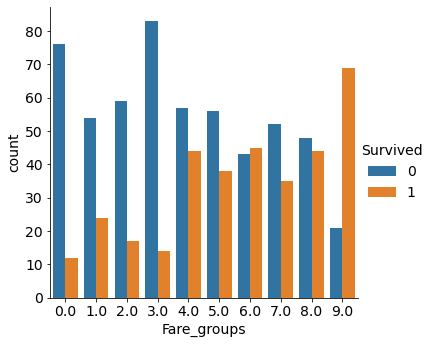

In [38]:

sns.catplot(x='Fare_groups', hue='Survived', data=df, kind='count')

In [39]:

from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1, 2, 4, 5, 7],
    'n_estimators': [1, 5, 10, 20, 40],
}

grid_search = GridSearchCV(
    # модель
    estimator=rf_clf,                   
    # сетка параметров
    #   может быть объектом dict 
    #   или list с несколькими dict внутри (несколько сеток)
    param_grid=parameters,              
    # кол-во фолдов для CV
    cv=5,                               
    # метрика для оценки - используем F1 
    scoring='f1_macro',   
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 4, 5, 7],
                         'n_estimators': [1, 5, 10, 20, 40]},
             scoring='f1_macro')

In [40]:
# Для поиска параметров модели внутри пайплайна используется специальное именование:
#   <название шага>__<название параметра>
pipe = Pipeline(steps=[
    ('clf', RandomForestClassifier()),
])

# В названии два подчеркивания!
parameters = {
    'clf__max_depth': [1, 2, 4, 5, 7],
    'clf__n_estimators': [1, 5, 10, 20, 40],
}

grid_search = GridSearchCV(
    # пайплайн
    estimator=pipe,                   
    param_grid=parameters,              
    cv=5,                               
    scoring='f1_macro',   
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__max_depth': [1, 2, 4, 5, 7],
                         'clf__n_estimators': [1, 5, 10, 20, 40]},
             scoring='f1_macro')

In [41]:

grid_search.cv_results_['params']

[{'clf__max_depth': 1, 'clf__n_estimators': 1},
 {'clf__max_depth': 1, 'clf__n_estimators': 5},
 {'clf__max_depth': 1, 'clf__n_estimators': 10},
 {'clf__max_depth': 1, 'clf__n_estimators': 20},
 {'clf__max_depth': 1, 'clf__n_estimators': 40},
 {'clf__max_depth': 2, 'clf__n_estimators': 1},
 {'clf__max_depth': 2, 'clf__n_estimators': 5},
 {'clf__max_depth': 2, 'clf__n_estimators': 10},
 {'clf__max_depth': 2, 'clf__n_estimators': 20},
 {'clf__max_depth': 2, 'clf__n_estimators': 40},
 {'clf__max_depth': 4, 'clf__n_estimators': 1},
 {'clf__max_depth': 4, 'clf__n_estimators': 5},
 {'clf__max_depth': 4, 'clf__n_estimators': 10},
 {'clf__max_depth': 4, 'clf__n_estimators': 20},
 {'clf__max_depth': 4, 'clf__n_estimators': 40},
 {'clf__max_depth': 5, 'clf__n_estimators': 1},
 {'clf__max_depth': 5, 'clf__n_estimators': 5},
 {'clf__max_depth': 5, 'clf__n_estimators': 10},
 {'clf__max_depth': 5, 'clf__n_estimators': 20},
 {'clf__max_depth': 5, 'clf__n_estimators': 40},
 {'clf__max_depth': 7, 'clf_

In [42]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__max_depth': 4, 'clf__n_estimators': 40}
0.7924833908496982


# Задачи


Проведите базовый анализ данных, разделите данные на обучение/тест, разработайте baseline модель решающего дерева DecisionTreeClassifier, оцените работу модели, отобразите важности признаков;

In [307]:
URL = 'https://raw.githubusercontent.com/KaiL4eK/ml_edu/master/datasets/Titanic_train.csv'
df1 = pd.read_csv(URL)

In [308]:
categorical_transformer.fit(df1[categorical_features])

X_transformed = categorical_transformer.transform(df1[categorical_features])

In [309]:
from sklearn.compose import ColumnTransformer
# Составляет список признаков для обработки
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Pclass','Age', 'Fare','SibSp',	'Parch']

# Создаем обработчик категориальных признаков
categorical_transformer = Pipeline(
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('enc', OneHotEncoder(handle_unknown='error')),                   
])

# Численные значения имеют пропуски, заполним стратегией медианы
numeric_transformer = SimpleImputer(strategy='median')

# Создаем конечный конвертер, который будет использован для 
#   предобработки
preprocessor = ColumnTransformer(
    # Список конвертеров, каждый кортеж содержит
    #   имя, конвертер и признаки, на которые он будет применен
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    # Признаки, не указанные ни в одном из конвертеров будут удалены
    remainder='drop'
)

preprocessor.fit(df1)

X_data = preprocessor.transform(df1)
print(type(X_data))

<class 'numpy.ndarray'>


In [310]:
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.8

y_data = df1['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_data
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 10) (712,)
(179, 10) (179,)


In [311]:
def show_importance(model, feature_names, X):
    importances = model.feature_importances_
    for feat_imp, feat_name in zip(importances, feature_names):
        print(f'Feature: {feat_name} | {feat_imp}')

    indices = np.argsort(importances)[::-1]
    sorted_feat_names = [feature_names[ind] for ind in indices]

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
    plt.xticks(range(X.shape[1]), sorted_feat_names, rotation=70)
    plt.xlim([-1, X.shape[1]])
    plt.show()


f1_score=0.7200000000000001
Feature: Sex_female | 0.5713000294628707
Feature: Sex_male | 0.0
Feature: Embarked_C | 0.0
Feature: Embarked_Q | 0.0
Feature: Embarked_S | 0.0
Feature: Pclass | 0.2632878756943254
Feature: Age | 0.08967439414171541
Feature: Fare | 0.05504374990907275
Feature: SibSp | 0.02069395079201579
Feature: Parch | 0.0


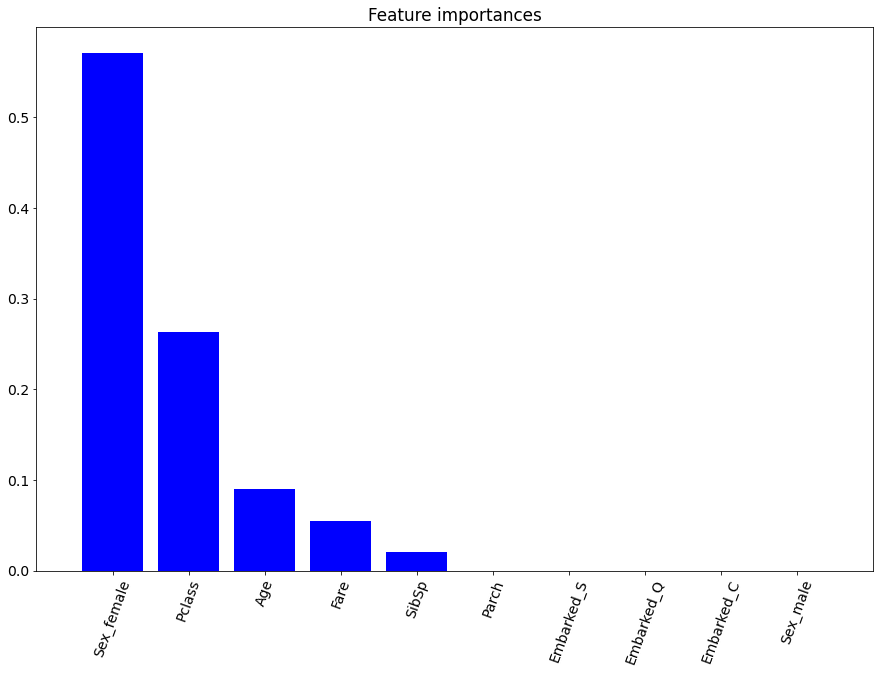

In [312]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
tree = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=3, criterion='entropy')
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')
ohe_column_names = preprocessor \
    .named_transformers_['cat'] \
    .named_steps['enc'] \
    .get_feature_names(categorical_features)

recovered_feat_names = \
    list(ohe_column_names) + \
    list(numeric_features)
show_importance(tree, recovered_feat_names, X_train)

Разработайте модель линейной регрессии, оцените и сравните с моделью дерева;

In [313]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)
y_pred=np.round(reg.predict(X_test))
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')

f1_score=0.7384615384615385


Произведите стандартизацию численных признаков и оцените (сравните) работу моделей с результатами обучения без стандартизации;

In [314]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

f1_score=0.7200000000000001
Feature: Sex_female | 0.5713000294628707
Feature: Sex_male | 0.0
Feature: Embarked_C | 0.0
Feature: Embarked_Q | 0.0
Feature: Embarked_S | 0.0
Feature: Pclass | 0.2632878756943254
Feature: Age | 0.08967439414171541
Feature: Fare | 0.05504374990907275
Feature: SibSp | 0.02069395079201579
Feature: Parch | 0.0


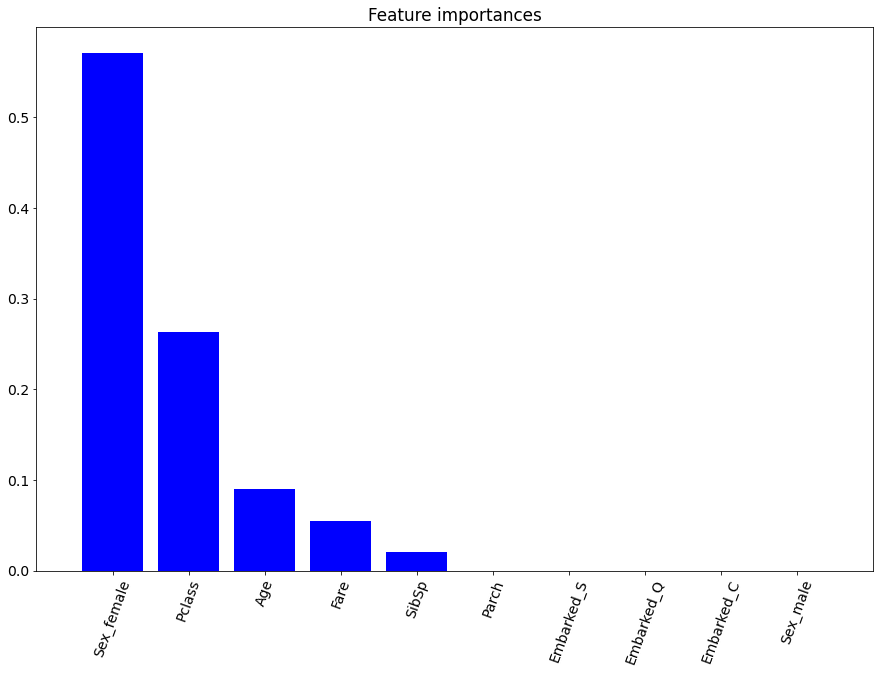

In [315]:
tree = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=3,criterion='entropy')
tree.fit(X_train_scaled, y_train)
y_pred=tree.predict(X_test_scaled)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')
show_importance(tree, recovered_feat_names, X_train_scaled)

In [316]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred=np.round(reg.predict(X_test_scaled))
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')

f1_score=0.71875


Изучите влияние max_depth и criterion на показатели дерева, попробуйте 5 разных значений для каждого критерия, оцените с помощью кросс-валидации на обучающей выборке, сделайте таблицу;

In [317]:
from sklearn.model_selection import cross_val_score
f1_scores=np.ndarray([5,2])
criterions={"gini", "entropy"}
max_depths=np.array(range(1,15,3))
n=-1
for i in criterions:
    m=0
    n=n+1
    for j in max_depths:
        tree = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=j,criterion=i)
        scores = cross_val_score(
            tree,     # Модель для оценки
            X_data,          # Данные для обучения
            y_data,          # Разметка для обучения
            cv=5,       # Количество фолдов
            scoring='f1_macro'  # Желаемая метрика
        )
        f1_scores[m,n]=scores.mean();
        m=m+1
f1_data=pd.DataFrame(data=f1_scores,columns=criterions,index=max_depths)
f1_data
     


,entropy,gini
1,0.770358,0.770358
4,0.778904,0.778416
7,0.792793,0.791572
10,0.787982,0.794543
13,0.778555,0.774521


Проведите расширенный анализ данных, выберите наиболее приоритетные для классификации признаки, сравните выбранные признаки с показателями важности признаков, создайте новые признаки; В результате расширенного анализа обратите внимание на следующие особенностями:
Проведите создание новых признаков, добавляя каждый новый признак проведите оценку модели:
FamilySize - размер родственников на корабле;
IsAlone - является ли пассажир один на корабле или нет (бинарный признак);
FarePerPerson - оплата билета на человека в семье (воспользоваться FamilySize);
*NameTitle (если придумаете как) - название титула, сформированое из признака Name, редкие титулы стоит объединить в одну группу;
Оцените работу модели при добавлении группировки признаков Age, Fare;

In [318]:
df1['FamilySize'] = df1['Parch'] + df1['SibSp'] + 1
isAlone=list();
for pers in df1['FamilySize']:
    if pers==1: isAlone.append(1);
    else: isAlone.append(0);
df1['isAlone'] = isAlone
df1['FarePerPerson'] =df1['Fare']/df1['FamilySize']
print(df1['FarePerPerson'])

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: FarePerPerson, Length: 891, dtype: float64


In [319]:
from sklearn.compose import ColumnTransformer
# Составляет список признаков для обработки
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Pclass','Age', 'Fare','FamilySize']

# Создаем обработчик категориальных признаков
categorical_transformer = Pipeline(
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('enc', OneHotEncoder(handle_unknown='error')),                   
])

# Численные значения имеют пропуски, заполним стратегией медианы
numeric_transformer = SimpleImputer(strategy='median')

# Создаем конечный конвертер, который будет использован для 
#   предобработки
preprocessor = ColumnTransformer(
    # Список конвертеров, каждый кортеж содержит
    #   имя, конвертер и признаки, на которые он будет применен
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    # Признаки, не указанные ни в одном из конвертеров будут удалены
    remainder='drop'
)

preprocessor.fit(df1)

X_data = preprocessor.transform(df1)
print(type(X_data))

<class 'numpy.ndarray'>


In [320]:
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.8

y_data = df1['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_data
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 9) (712,)
(179, 9) (179,)


f1_score=0.7200000000000001
Feature: Sex_female | 0.0
Feature: Sex_male | 0.5693649875674883
Feature: Embarked_C | 0.0
Feature: Embarked_Q | 0.0
Feature: Embarked_S | 0.0
Feature: Pclass | 0.2623960972176224
Feature: Age | 0.08937065932522958
Feature: Fare | 0.017547499612378704
Feature: FamilySize | 0.06132075627728098


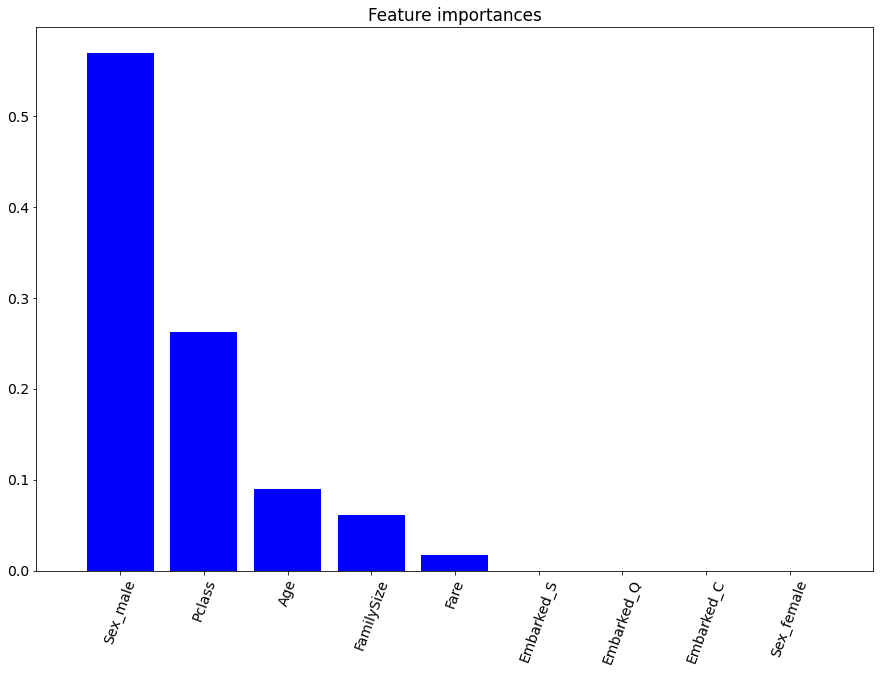

In [321]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
tree = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=3, criterion='entropy')
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')
ohe_column_names = preprocessor \
    .named_transformers_['cat'] \
    .named_steps['enc'] \
    .get_feature_names(categorical_features)

recovered_feat_names = \
    list(ohe_column_names) + \
    list(numeric_features)
show_importance(tree, recovered_feat_names, X_train)

<class 'numpy.ndarray'>
(712, 9) (712,)
(179, 9) (179,)
f1_score=0.703125
Feature: Sex_female | 0.0
Feature: Sex_male | 0.5770283076941427
Feature: Embarked_C | 0.0
Feature: Embarked_Q | 0.0
Feature: Embarked_S | 0.0
Feature: Pclass | 0.27680249670337287
Feature: Age | 0.09057353619207983
Feature: Fare | 0.055595659410404605
Feature: isAlone | 0.0


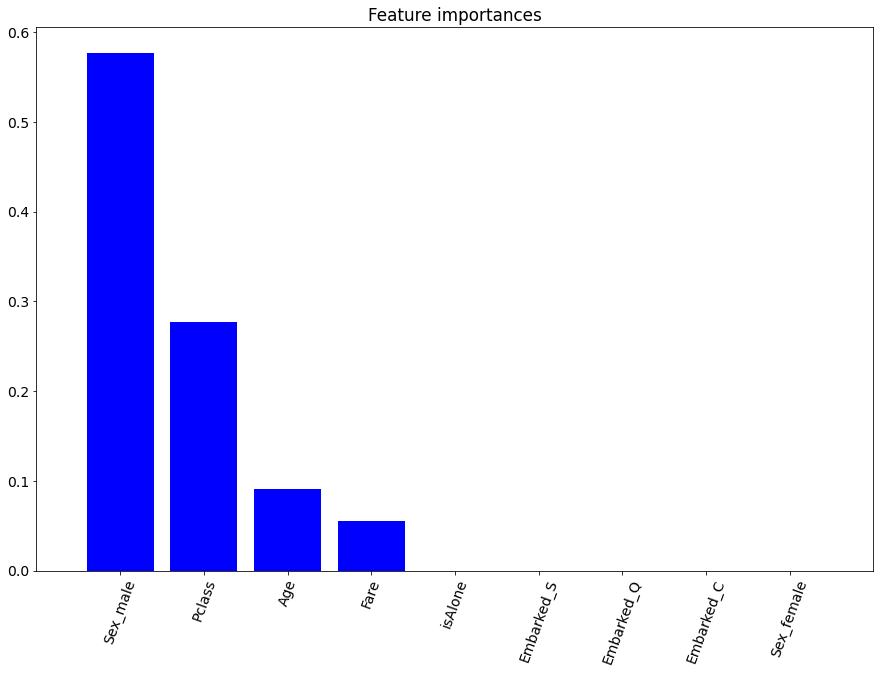

In [322]:
from sklearn.compose import ColumnTransformer
# Составляет список признаков для обработки
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Pclass','Age', 'Fare','isAlone']

# Создаем обработчик категориальных признаков
categorical_transformer = Pipeline(
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('enc', OneHotEncoder(handle_unknown='error')),                   
])

# Численные значения имеют пропуски, заполним стратегией медианы
numeric_transformer = SimpleImputer(strategy='median')

# Создаем конечный конвертер, который будет использован для 
#   предобработки
preprocessor = ColumnTransformer(
    # Список конвертеров, каждый кортеж содержит
    #   имя, конвертер и признаки, на которые он будет применен
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    # Признаки, не указанные ни в одном из конвертеров будут удалены
    remainder='drop'
)

preprocessor.fit(df1)

X_data = preprocessor.transform(df1)
print(type(X_data))

from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.8

y_data = df1['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_data
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
tree = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=3, criterion='entropy')
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')
ohe_column_names = preprocessor \
    .named_transformers_['cat'] \
    .named_steps['enc'] \
    .get_feature_names(categorical_features)

recovered_feat_names = \
    list(ohe_column_names) + \
    list(numeric_features)
show_importance(tree, recovered_feat_names, X_train)

<class 'numpy.ndarray'>
(712, 9) (712,)
(179, 9) (179,)
f1_score=0.7132867132867132
Feature: Sex_female | 0.0
Feature: Sex_male | 0.5449683534396205
Feature: Embarked_C | 0.0
Feature: Embarked_Q | 0.0
Feature: Embarked_S | 0.0
Feature: Pclass | 0.17912180325816726
Feature: Age | 0.10302492843666713
Feature: Fare | 0.05250673938051876
Feature: FarePerPerson | 0.12037817548502637


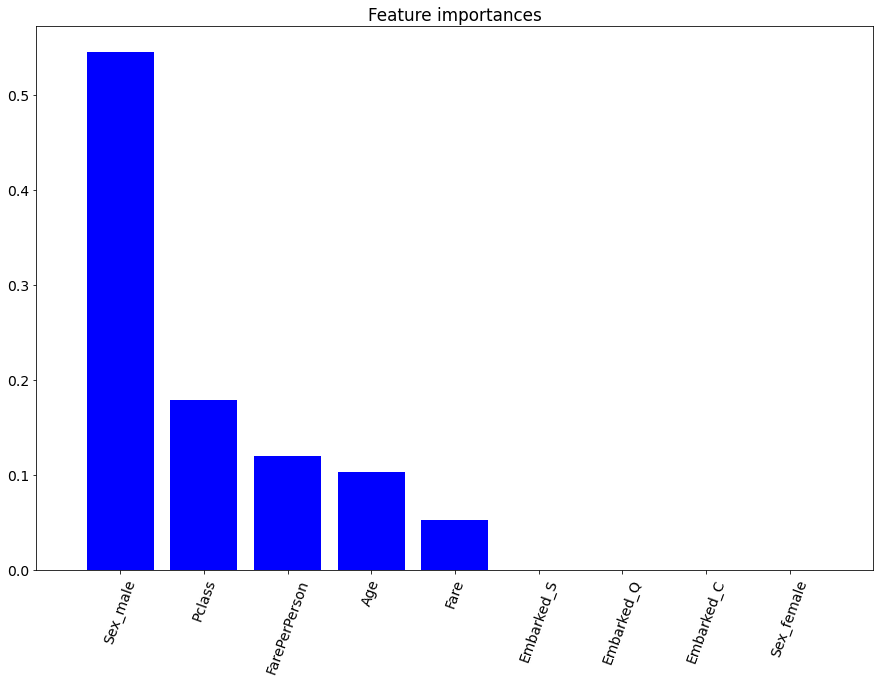

In [323]:
from sklearn.compose import ColumnTransformer
# Составляет список признаков для обработки
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Pclass','Age', 'Fare','FarePerPerson']

# Создаем обработчик категориальных признаков
categorical_transformer = Pipeline(
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('enc', OneHotEncoder(handle_unknown='error')),                   
])

# Численные значения имеют пропуски, заполним стратегией медианы
numeric_transformer = SimpleImputer(strategy='median')

# Создаем конечный конвертер, который будет использован для 
#   предобработки
preprocessor = ColumnTransformer(
    # Список конвертеров, каждый кортеж содержит
    #   имя, конвертер и признаки, на которые он будет применен
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    # Признаки, не указанные ни в одном из конвертеров будут удалены
    remainder='drop'
)

preprocessor.fit(df1)

X_data = preprocessor.transform(df1)
print(type(X_data))

from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.8

y_data = df1['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_data
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
tree = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=3, criterion='entropy')
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')
ohe_column_names = preprocessor \
    .named_transformers_['cat'] \
    .named_steps['enc'] \
    .get_feature_names(categorical_features)

recovered_feat_names = \
    list(ohe_column_names) + \
    list(numeric_features)
show_importance(tree, recovered_feat_names, X_train)

[array([  0.    ,   7.55  ,   7.8542,   8.05  ,  10.5   ,  14.4542,
        21.6792,  27.    ,  39.6875,  77.9583, 512.3292])]


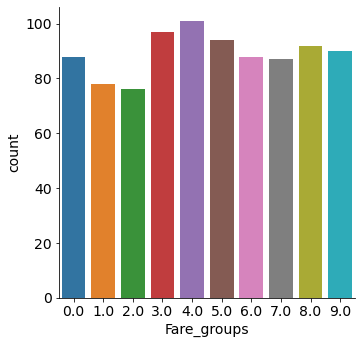

In [324]:
from sklearn.preprocessing import KBinsDiscretizer

discr = KBinsDiscretizer(
    # Количество бинов    
    n_bins=10,
    # Способ кодирования - порядковый
    encode='ordinal',
)

# Двойные скобки для передачи DataFrame (2D данные)
df1['Fare_groups'] = discr.fit_transform(df1[['Fare']])
# Отобразим границы бинов
print(discr.bin_edges_)

sns.catplot(x='Fare_groups', kind="count", data=df1)

<class 'numpy.ndarray'>
(712, 8) (712,)
(179, 8) (179,)
f1_score=0.6551724137931035
Feature: Sex_female | 0.5808746120589268
Feature: Sex_male | 0.0
Feature: Embarked_C | 0.0
Feature: Embarked_Q | 0.0
Feature: Embarked_S | 0.03548505905607106
Feature: Pclass | 0.2786475823552498
Feature: Age | 0.09117727327558904
Feature: Fare_groups | 0.013815473254163296


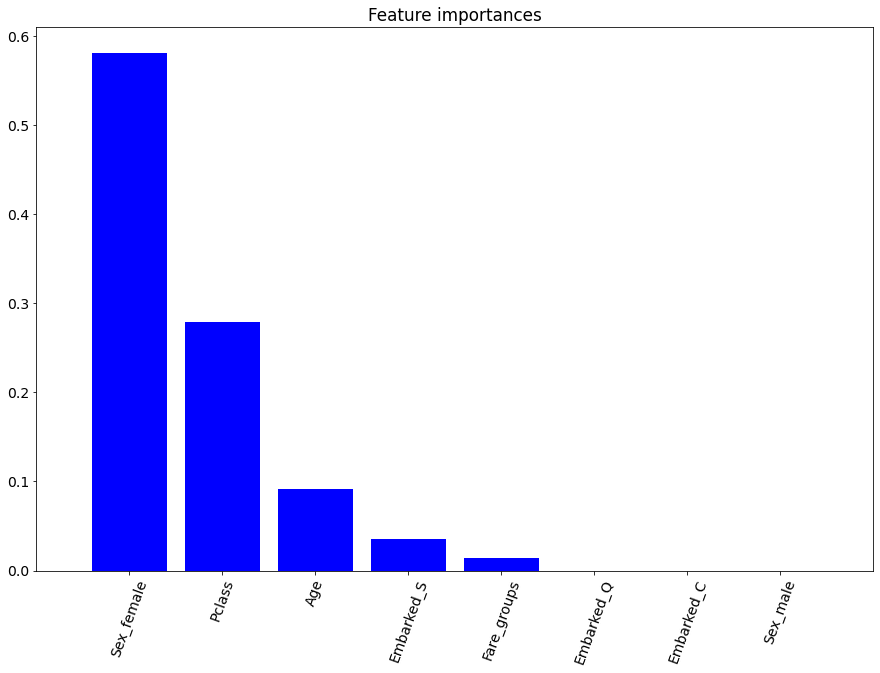

In [325]:
from sklearn.compose import ColumnTransformer
# Составляет список признаков для обработки
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Pclass','Age', 'Fare_groups']

# Создаем обработчик категориальных признаков
categorical_transformer = Pipeline(
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('enc', OneHotEncoder(handle_unknown='error')),                   
])

# Численные значения имеют пропуски, заполним стратегией медианы
numeric_transformer = SimpleImputer(strategy='median')

# Создаем конечный конвертер, который будет использован для 
#   предобработки
preprocessor = ColumnTransformer(
    # Список конвертеров, каждый кортеж содержит
    #   имя, конвертер и признаки, на которые он будет применен
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    # Признаки, не указанные ни в одном из конвертеров будут удалены
    remainder='drop'
)

preprocessor.fit(df1)

X_data = preprocessor.transform(df1)
print(type(X_data))

from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.8

y_data = df1['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_data
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
tree = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=3, criterion='entropy')
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')
ohe_column_names = preprocessor \
    .named_transformers_['cat'] \
    .named_steps['enc'] \
    .get_feature_names(categorical_features)

recovered_feat_names = \
    list(ohe_column_names) + \
    list(numeric_features)
show_importance(tree, recovered_feat_names, X_train)

(891, 1)
[array([ 0.42      , 16.        , 20.        , 24.        , 28.        ,
       29.69911765, 32.5       , 38.        , 47.        , 80.        ])]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


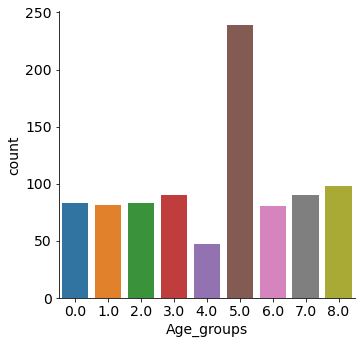

In [326]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
# Двойные скобки использованы, чтобы передать в fit() 2D массив
X_in = df1[['Age']]
print(X_in.shape)

df1['Age'] = imp.fit_transform(X_in)
df1.isnull().sum()
discr = KBinsDiscretizer(
    # Количество бинов    
    n_bins=10,
    # Способ кодирования - порядковый
    encode='ordinal',
)

# Двойные скобки для передачи DataFrame (2D данные)
df1['Age_groups'] = discr.fit_transform(df1[['Age']])
# Отобразим границы бинов
print(discr.bin_edges_)

sns.catplot(x='Age_groups', kind="count", data=df1)

<class 'numpy.ndarray'>
(712, 8) (712,)
(179, 8) (179,)
f1_score=0.7462686567164178
Feature: Sex_female | 0.5772367095102524
Feature: Sex_male | 0.0
Feature: Embarked_C | 0.0
Feature: Embarked_Q | 0.0
Feature: Embarked_S | 0.0
Feature: Pclass | 0.18972786155690588
Feature: Age_groups | 0.08779046261150357
Feature: Fare | 0.14524496632133815


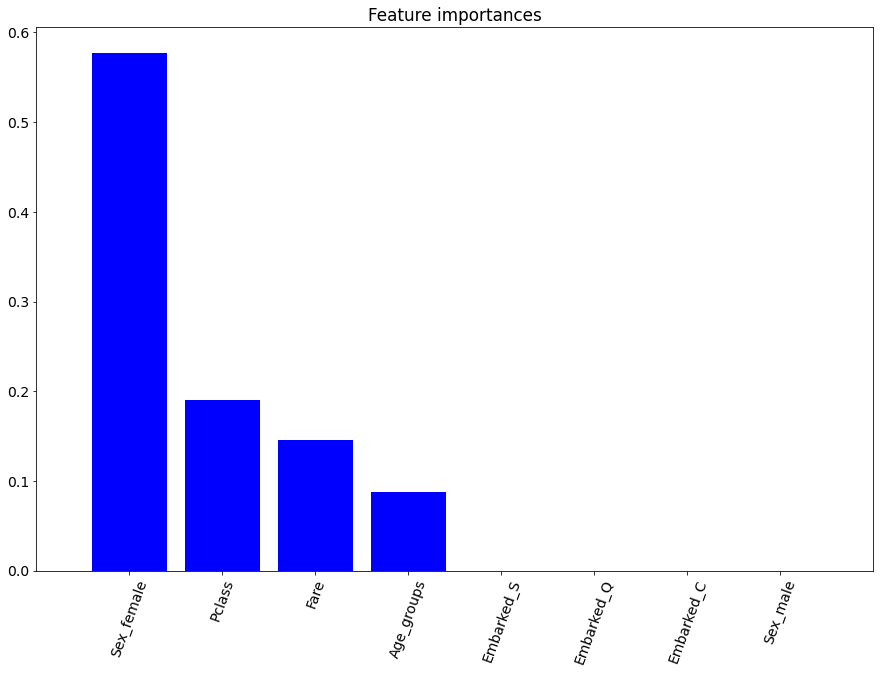

In [327]:
from sklearn.compose import ColumnTransformer
# Составляет список признаков для обработки
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Pclass', 'Age_groups','Fare']

# Создаем обработчик категориальных признаков
categorical_transformer = Pipeline(
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('enc', OneHotEncoder(handle_unknown='error')),                   
])

# Численные значения имеют пропуски, заполним стратегией медианы
numeric_transformer = SimpleImputer(strategy='median')

# Создаем конечный конвертер, который будет использован для 
#   предобработки
preprocessor = ColumnTransformer(
    # Список конвертеров, каждый кортеж содержит
    #   имя, конвертер и признаки, на которые он будет применен
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    # Признаки, не указанные ни в одном из конвертеров будут удалены
    remainder='drop'
)

preprocessor.fit(df1)

X_data = preprocessor.transform(df1)
print(type(X_data))

from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.8

y_data = df1['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_data
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
tree = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=3, criterion='entropy')
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')
ohe_column_names = preprocessor \
    .named_transformers_['cat'] \
    .named_steps['enc'] \
    .get_feature_names(categorical_features)

recovered_feat_names = \
    list(ohe_column_names) + \
    list(numeric_features)
show_importance(tree, recovered_feat_names, X_train)

С использованием 'Age_groups' получено наилучшее значение f1 среди всех выше представленных опытов, продолжим работать с этими данными

Обучите модель дерева и модель леса RandomForestClassifier по подготовленным данным;

f1_score=0.7244094488188977
Feature: Sex_female | 0.29052249237309186
Feature: Sex_male | 0.307594486497756
Feature: Embarked_C | 0.01856451044398174
Feature: Embarked_Q | 0.0035096182818737517
Feature: Embarked_S | 0.030227507137614355
Feature: Pclass | 0.12932192034596776
Feature: Age_groups | 0.04145579841178538
Feature: Fare | 0.17880366650792917


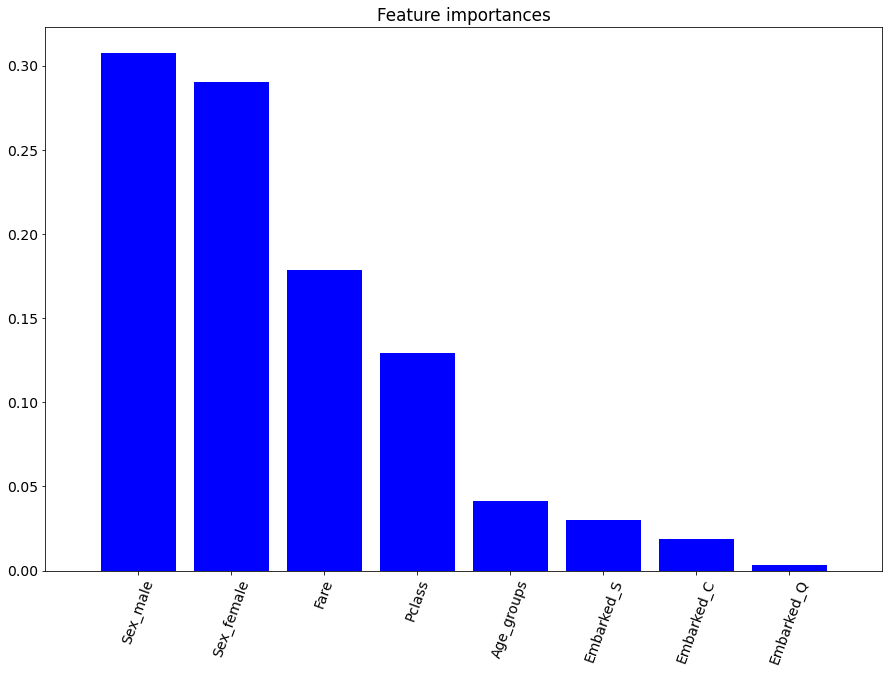

In [335]:
rf = RandomForestClassifier(max_depth=3,criterion='entropy')
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')
show_importance(rf_clf, recovered_feat_names, X_train)

Оцените влияние аргументов max_depth и n_estimators на точность модели (5 значений для каждого) с помощью кросс-валидации на обучающей выборке. Постройте таблицу зависимости метрик от величин;

In [368]:
f1_scores=np.ndarray([5,5])
n_estimators=np.array(range(1,400,80))
max_depths=np.array(range(1,30,6))
n=-1
for i in n_estimators:
    m=0
    n=n+1
    for j in max_depths:
        rf = RandomForestClassifier(random_state=RANDOM_STATE,max_depth=j,criterion='entropy',n_estimators=i)
        scores = cross_val_score(
            rf,     # Модель для оценки
            X_data,          # Данные для обучения
            y_data,          # Разметка для обучения
            cv=5,       # Количество фолдов
            scoring='f1_macro'  # Желаемая метрика
        )
        f1_scores[m,n]=scores.mean();
        m=m+1
f1_data=pd.DataFrame(data=f1_scores,columns=n_estimators,index=max_depths)
f1_data

,1,81,161,241,321
1,0.657511,0.769582,0.762579,0.755597,0.765084
7,0.763849,0.816615,0.822875,0.818106,0.815504
13,0.746232,0.785098,0.787087,0.787375,0.790144
19,0.753345,0.781858,0.783422,0.785802,0.783667
25,0.751581,0.777641,0.783422,0.784544,0.785783


Максимально значение f1=0.822875 получено при n_estimators=161 и max_depths=7

Определите наилучшие параметры для модели случайного леса через GridSearchCV;

In [352]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1, 2, 4, 5, 7],
    'n_estimators': [1, 5, 10, 20, 40],
}

grid_search = GridSearchCV(
    # модель
    estimator=rf,                   
    # сетка параметров
    #   может быть объектом dict 
    #   или list с несколькими dict внутри (несколько сеток)
    param_grid=parameters,              
    # кол-во фолдов для CV
    cv=5,                               
    # метрика для оценки - используем F1 
    scoring='f1_macro',   
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'n_estimators': 20}
0.7987121869356596


В предыдущем пункте с помощью кросс-валидации было получено сочетание параметров леса, при которых значение f1 выше, чем при определении лучших параметров с помощью GridSearchCV

Определите наилучшие параметры для модели случайного леса через RandomizedSearchCV;

In [354]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'max_depth': [1, 2, 4, 5, 7],
    'n_estimators': [1, 5, 10, 20, 40],
}

rand_search = RandomizedSearchCV(
    # модель
    estimator=rf,                   
    # сетка параметров
    #   может быть объектом dict 
    #   или list с несколькими dict внутри (несколько сеток)
    param_distributions=parameters,              
    # кол-во фолдов для CV
    cv=5,                               
    # метрика для оценки - используем F1 
    scoring='f1_macro',   
)

rand_search.fit(X_train, y_train)
print(rand_search.best_params_)
print(rand_search.best_score_)

{'n_estimators': 10, 'max_depth': 7}
0.8004967099214332


В предыдущем пункте с помощью кросс-валидации было получено сочетание параметров леса, при которых значение f1 выше, чем при определении лучших параметров с помощью RandomizedSearchCV

Постройте лучшие модели леса и решающего дерева и сравните их по показателям на выборке для теста.

In [369]:
rf = RandomForestClassifier(random_state=RANDOM_STATE, max_depth=7,criterion='entropy',n_estimators=161)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')

f1_score=0.7839999999999999


In [367]:
tree = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=3, criterion='entropy')
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')

f1_score=0.7462686567164178


При использовании RandomForest результаты получаются лучше, чем при использовнии дерева

Примените подход Recursive Feature Elimination на лучшую модель случайного леса. Сравните оценку важности признаков RFE и то, что показывает лес

In [364]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator=estimator,n_features_to_select=7, step=1)
selector = selector.fit(X_data, y_data)
top7=selector.support_
print(selector.support_)
print(selector.ranking_)
selector = RFE(estimator=estimator,n_features_to_select=5, step=1)
selector = selector.fit(X_data, y_data)
top5=selector.support_
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True  True  True  True False]
[1 1 1 1 1 1 1 2]
[ True  True  True  True False  True False False]
[1 1 1 1 2 1 3 4]


In [365]:
print(np.array(recovered_feat_names)[top5])
print(np.array(recovered_feat_names)[top7])
print(recovered_feat_names)

['Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Pclass']
['Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Pclass'
 'Age_groups']
['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass', 'Age_groups', 'Fare']


f1_score=0.7839999999999999
Feature: Sex_female | 0.17894785822477938
Feature: Sex_male | 0.20022750491602861
Feature: Embarked_C | 0.01579459563043168
Feature: Embarked_Q | 0.010059528001897484
Feature: Embarked_S | 0.02030570378847095
Feature: Pclass | 0.14567298749237967
Feature: Age_groups | 0.1402626318680458
Feature: Fare | 0.2887291900779663


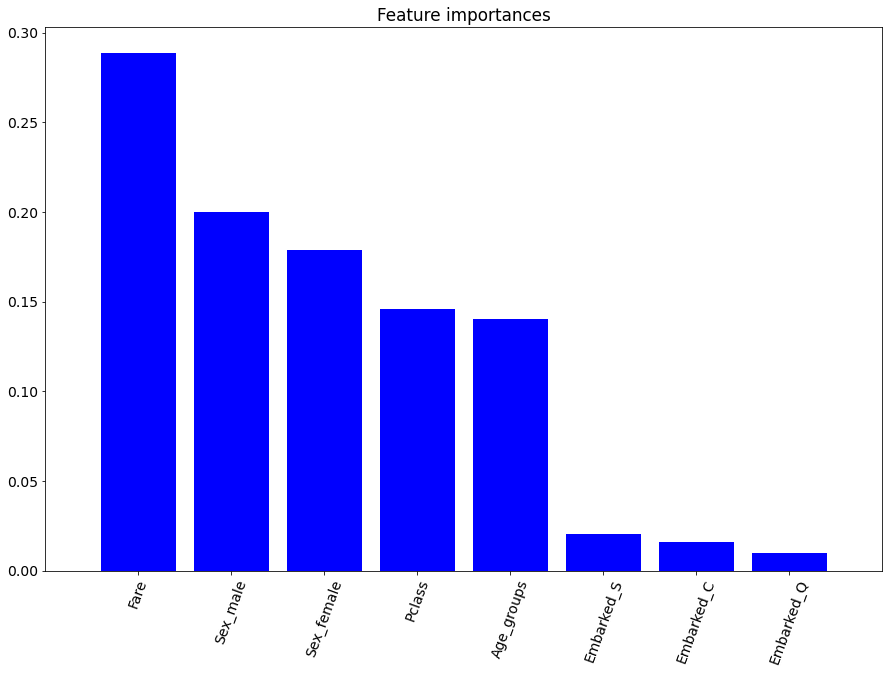

In [372]:
rf = RandomForestClassifier(random_state=RANDOM_STATE, max_depth=7,criterion='entropy',n_estimators=81)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
f1 = f1_score(y_test,y_pred)
print(f'f1_score={f1}')
show_importance(rf, recovered_feat_names, X_train)

При оценки важности признаков модели не все признаки совпадают

Топ 5 согласно REF:'Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Pclass'

Топ 5 согласно важности в лесу: 'Fare' 'Sex_female' 'Sex_male' 'Pclass' 'Age_groups'

Необъяснимо, но факт...

Постройте ROC кривые моделей, сравните их и сделайте выводы:

    лучшая модель на всех признаках;

    лучшая модель только на топ-7 лучших признаках по RFE;

    лучшая модель на топ-5 лучших признаках по RFE.


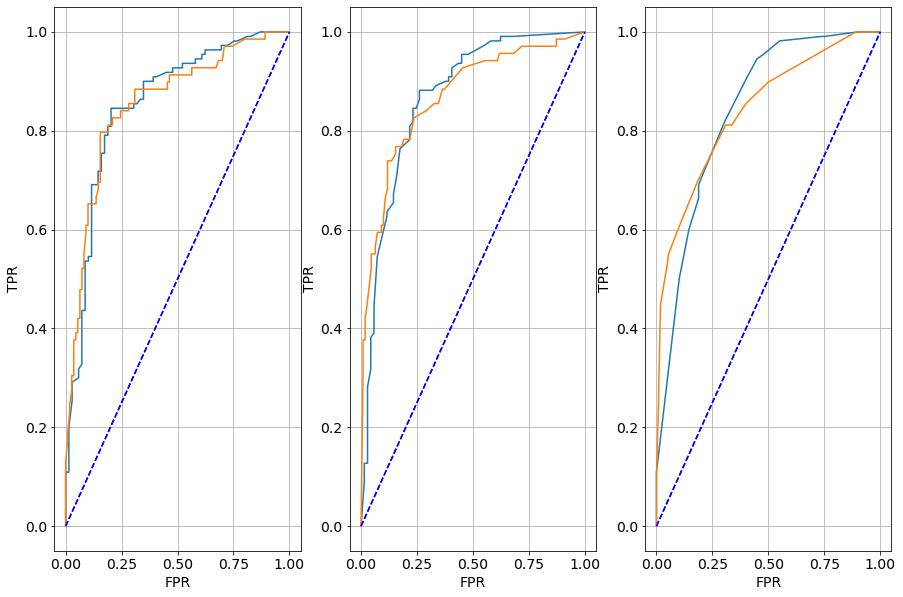

In [375]:

TRAIN_RATIO = 0.8
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_data
)
X_test7=X_test[:,top7]
X_test5=X_test[:,top5]
X_train7=X_train[:,top7]
X_train5=X_train[:,top5]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
diag_values = np.array([
        [0, 0],
        [1, 1],
    ])

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_proba = rf.predict_proba(X_test)
plt.subplot(131)
for i in range (2):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,i],pos_label=i)
    plt.plot(fpr, tpr)
    plt.plot(diag_values[:,0], diag_values[:,1], 'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)
rf=RandomForestClassifier()
rf.fit(X_train7,y_train)
y_pred_proba = rf.predict_proba(X_test7)
plt.subplot(132)
for i in range (2):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,i],pos_label=i)
    plt.plot(fpr, tpr)
    plt.plot(diag_values[:,0], diag_values[:,1], 'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)
rf=RandomForestClassifier()
rf.fit(X_train5,y_train)
y_pred_proba = rf.predict_proba(X_test5)
plt.subplot(133)
for i in range (2):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,i],pos_label=i)
    plt.plot(fpr, tpr)
    plt.plot(diag_values[:,0], diag_values[:,1], 'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)